In [12]:
from tensorflow import keras
from keras import layers
import keras
inputs = keras.Input(shape=(180,180,3))
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.1),
    layers.RandomZoom(.2),
])
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters = 32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2) (x)

In [13]:
x = layers.Conv2D(filters = 64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [14]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [9]:
import pathlib
org_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_dogs")
from keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_dir / "train", image_size = (180,180), batch_size = 32
)

validation_set = image_dataset_from_directory(
    new_dir / "validation", image_size = (180,180), batch_size = 32
)

test_set = image_dataset_from_directory(
    new_dir / "test", image_size = (180,180), batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


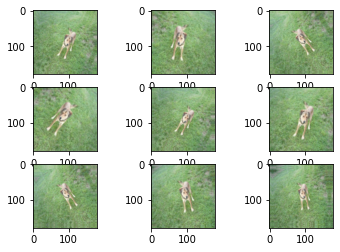

In [11]:
import matplotlib.pyplot as plt
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_imgs = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_imgs[0].numpy().astype("uint8"))
        

In [16]:
model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics=["accuracy"])

In [17]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

In [19]:

history = model.fit(
train_dataset,
epochs=60,
validation_data=validation_set,
callbacks=callbacks)

Epoch 1/60


2022-08-26 14:26:03.541344: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 129777664 exceeds 10% of free system memory.
2022-08-26 14:26:03.600329: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 32444416 exceeds 10% of free system memory.
2022-08-26 14:26:03.611400: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62005248 exceeds 10% of free system memory.
2022-08-26 14:26:03.651558: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27541504 exceeds 10% of free system memory.
2022-08-26 14:26:03.778369: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27541504 exceeds 10% of free system memory.


63/63 [==============================] - 46s 712ms/step - loss: 0.7026 - accuracy: 0.5100 - val_loss: 0.6879 - val_accuracy: 0.6030
Epoch 2/60
63/63 [==============================] - 50s 795ms/step - loss: 0.6933 - accuracy: 0.5615 - val_loss: 0.6815 - val_accuracy: 0.5860
Epoch 3/60
63/63 [==============================] - 47s 741ms/step - loss: 0.6646 - accuracy: 0.6335 - val_loss: 0.6530 - val_accuracy: 0.6110
Epoch 4/60
63/63 [==============================] - 46s 727ms/step - loss: 0.6230 - accuracy: 0.6790 - val_loss: 0.6047 - val_accuracy: 0.6840
Epoch 5/60
63/63 [==============================] - 48s 759ms/step - loss: 0.5746 - accuracy: 0.7060 - val_loss: 0.5639 - val_accuracy: 0.7310
Epoch 6/60
63/63 [==============================] - 47s 752ms/step - loss: 0.5265 - accuracy: 0.7435 - val_loss: 0.5773 - val_accuracy: 0.7070
Epoch 7/60
63/63 [==============================] - 52s 818ms/step - loss: 0.4775 - accuracy: 0.7805 - val_loss: 0.6231 - val_accuracy: 0.7110
Epoch 8/60

KeyboardInterrupt: 

Because we have so little data to work with, using ConvNets from stratch would prove difficul to go over 90%